<h1 style="text-align: center;">Telco Customer Churn</h1>
<h3 style="text-align: center;">Jawed Iqbal Alfaruqiy - JCDS0512</h3>

---

## **Section 1. Business Understanding**

### **1.1 Context**

Perusahaan telekomunikasi menghadapi tantangan churn pelanggan yang cukup tinggi, yang berdampak langsung pada pendapatan. Setiap pelanggan yang hilang bukan hanya berarti kehilangan pendapatan, tetapi juga berpotensi menambah biaya akuisisi pelanggan baru. Tanpa prediksi yang akurat, perusahaan harus memperlakukan semua pelanggan sama dalam kampanye retensi, yang menyebabkan biaya intervensi membengkak dan hasilnya tidak optimal.

Target :

0 : Tidak churn

1 : Churn

### **1.2 Problem Statements**

Saat ini, tidak ada sistem yang mampu memprediksi secara akurat pelanggan yang berisiko churn. Akibatnya, strategi retensi menjadi mahal dan kurang tepat sasaran. Perusahaan ingin membangun sistem prediksi yang tidak hanya akurat, tetapi juga dapat dioptimalkan untuk meminimalkan total biaya, termasuk biaya retensi dan biaya kehilangan pelanggan.

### **1.3 Goals**

Perusahaan ingin membangun model prediksi churn yang tidak hanya akurat, tetapi juga dapat membantu menghemat biaya. Model ini akan digunakan untuk mengidentifikasi pelanggan yang paling berisiko churn, sehingga tim retensi bisa lebih fokus dalam memberikan intervensi. Dengan strategi ini, perusahaan berharap dapat mengurangi jumlah pelanggan yang hilang tanpa harus mengeluarkan biaya retensi yang berlebihan. Target akhirnya adalah menciptakan sistem yang efektif dalam menjaga pelanggan, namun tetap efisien dari sisi anggaran.

### **1.4 Stakeholders**

Satu-satunya stakeholder utama dalam proyek ini adalah **Churn Retention Team**, yang akan menggunakan hasil prediksi untuk menentukan strategi intervensi kepada pelanggan.

### **1.4 Analytical Approach**

Model klasifikasi akan dibangun berdasarkan data historis pelanggan. Model akan dipilih berdasarkan ROC AUC, untuk menjamin kemampuan generalisasi dalam memisahkan pelanggan churn dan tidak churn secara menyeluruh. Setelah model terbaik dipilih, dilakukan threshold tuning untuk mencari titik prediksi yang menghasilkan biaya total terendah (gabungan antara biaya retensi dan kehilangan pelanggan).

### **1.5 Metric Evaluation**

Dalam memprediksi churn, setiap kesalahan memiliki dampak biaya. Jika pelanggan diprediksi akan churn padahal tidak, perusahaan mengeluarkan biaya retensi yang tidak perlu. Sebaliknya, jika pelanggan benar-benar churn tapi tidak terdeteksi, perusahaan kehilangan pendapatan. Maka, evaluasi model tidak hanya melihat akurasi, tapi juga dampaknya terhadap biaya. ROC AUC dipilih sebagai metrik utama karena mampu menilai kemampuan model secara menyeluruh, terutama saat data tidak seimbang. Setelah model terbaik ditemukan, dilakukan threshold tuning untuk menyesuaikan prediksi agar menghasilkan kombinasi precision dan recall yang memberikan biaya total paling rendah bagi perusahaan.

### **1.6 Success Criteria**

Proyek ini dianggap berhasil jika model mampu memprediksi pelanggan yang akan churn dengan baik dan membantu perusahaan mengurangi biaya. Secara teknis, model yang dibangun harus memiliki nilai ROC AUC minimal 0.80 sebagai bukti kemampuan memisahkan pelanggan churn dan tidak churn. Selain itu, setelah threshold disesuaikan, model juga harus menghasilkan total biaya (gabungan biaya retensi dan kehilangan pelanggan) yang lebih rendah dibandingkan strategi tanpa prediksi. Yang terpenting, hasil prediksi dapat langsung digunakan oleh tim retensi untuk fokus hanya pada pelanggan berisiko, sehingga strategi menjadi lebih efisien dan tepat sasaran.

## **Section 2. Data Understanding**

### **2.1 General Information**

Dataset ini mewakili profil pelanggan yang telah berhenti berlangganan dari perusahaan telekomunikasi. Churn dalam industri telekomunikasi dan layanan berlangganan lainnya mengacu pada situasi di mana pelanggan meninggalkan penyedia layanan.

### **2.2 Features Information**
| **Attribute**    | **Data Type, Length**                          | **Description**                                    |
| ---------------- | ---------------------------------------------- | -------------------------------------------------- |
| Dependents       | Categorical (Yes/No)                           | Apakah pelanggan memiliki tanggungan.              |
| Tenure           | Integer                                        | Lama berlangganan (dalam bulan).                   |
| OnlineSecurity   | Categorical (Yes/No/No Internet)               | Apakah pelanggan memiliki layanan keamanan online. |
| OnlineBackup     | Categorical (Yes/No/No Internet)               | Apakah pelanggan memiliki cadangan data online.    |
| InternetService  | Categorical (DSL/Fiber/No)                     | Jenis layanan internet yang digunakan.             |
| DeviceProtection | Categorical (Yes/No/No Internet)               | Apakah pelanggan memiliki perlindungan perangkat.  |
| TechSupport      | Categorical (Yes/No/No Internet)               | Apakah pelanggan memiliki layanan bantuan teknis.  |
| Contract         | Categorical (Month-to-month/One year/Two year) | Jenis kontrak langganan.                           |
| PaperlessBilling | Categorical (Yes/No)                           | Apakah tagihan dikirim dalam bentuk digital.       |
| MonthlyCharges   | Float                                          | Jumlah tagihan pelanggan setiap bulan.             |
| Churn            | Categorical (Yes/No)                           | Apakah pelanggan berhenti berlangganan.            |


### **2.3 Statistics Summary**

In [2]:
# Library

import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [3]:
#Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [5]:
df.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


## **Section 3. Data Cleaning**

### **3.1 Missing Values**

In [6]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

### **3.2 Duplicated Values**

In [7]:
df.duplicated().sum()

np.int64(77)

In [8]:
df.drop_duplicates(inplace=True)

### **3.3 Identify Spelling Errors**

In [9]:
# Memeriksa nilai unik dalam kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].unique()
    print(f"\nUnique values in {col} ({len(unique_values)}):")
    print(sorted(unique_values))


Unique values in Dependents (2):
['No', 'Yes']

Unique values in OnlineSecurity (3):
['No', 'No internet service', 'Yes']

Unique values in OnlineBackup (3):
['No', 'No internet service', 'Yes']

Unique values in InternetService (3):
['DSL', 'Fiber optic', 'No']

Unique values in DeviceProtection (3):
['No', 'No internet service', 'Yes']

Unique values in TechSupport (3):
['No', 'No internet service', 'Yes']

Unique values in Contract (3):
['Month-to-month', 'One year', 'Two year']

Unique values in PaperlessBilling (2):
['No', 'Yes']

Unique values in Churn (2):
['No', 'Yes']


### **3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

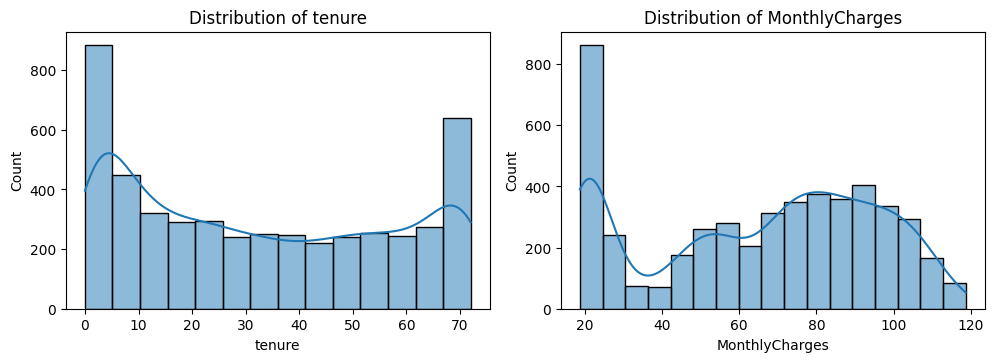

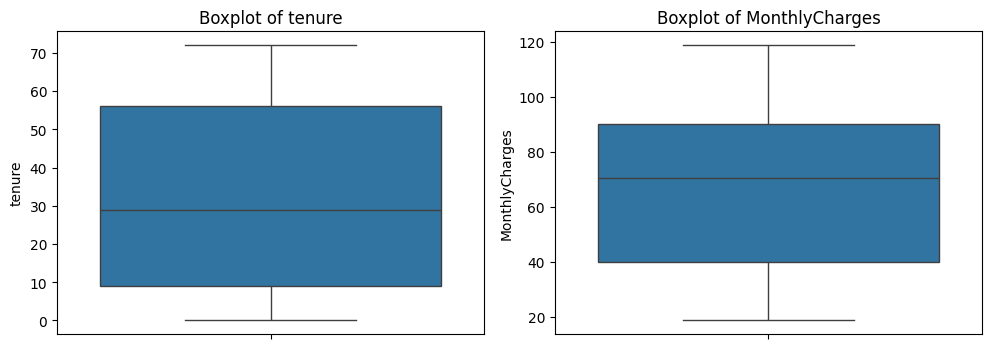

In [10]:
# 1. Visualisasi distribusi dengan histogram
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# 2. Box plot untuk melihat outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [11]:
# Cek outlier pada kolom MonthlyCharges dan tenure dengan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_monthly_charges = detect_outliers_iqr(df, 'MonthlyCharges')
outliers_tenure = detect_outliers_iqr(df, 'tenure')

print("Jumlah outlier pada MonthlyCharges:", outliers_monthly_charges.shape[0])
print("Jumlah outlier pada tenure:", outliers_tenure.shape[0])

Jumlah outlier pada MonthlyCharges: 0
Jumlah outlier pada tenure: 0


In [12]:
# Cek outlier pada kolom MonthlyCharges dan tenure dengan metode Z-Score
z_scores = np.abs(stats.zscore(df[['MonthlyCharges', 'tenure']]))

# Buat DataFrame boolean: True jika outlier
outliers = (z_scores > 3)

# Tampilkan baris yang mengandung outlier pada salah satu kolom
outlier_rows = df[(outliers.any(axis=1))]

print("Jumlah outlier:", outlier_rows.shape[0])

Jumlah outlier: 0


Overall:
Tidak adanya outlier, missing value, maupun spelling error pada dataset ini. Meskipun terdapat duplikasi data, namun jumlahnya tidak signifikan (hanya 11 data). Oleh karena itu, tidak perlu dilakukan handling terhadap duplikasi data ini.

## **Section 4. Exploratory Data Analysis (EDA)**

In [13]:
# Pisahkan fitur numerik dan kategorikal
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).drop(columns=['Churn']).columns

# Tampilkan fitur numerik dan kategorikal
print(f"Fitur numerik: {num_features}")
print(f"Fitur kategorikal: {cat_features}")

Fitur numerik: Index(['tenure', 'MonthlyCharges'], dtype='object')
Fitur kategorikal: Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')


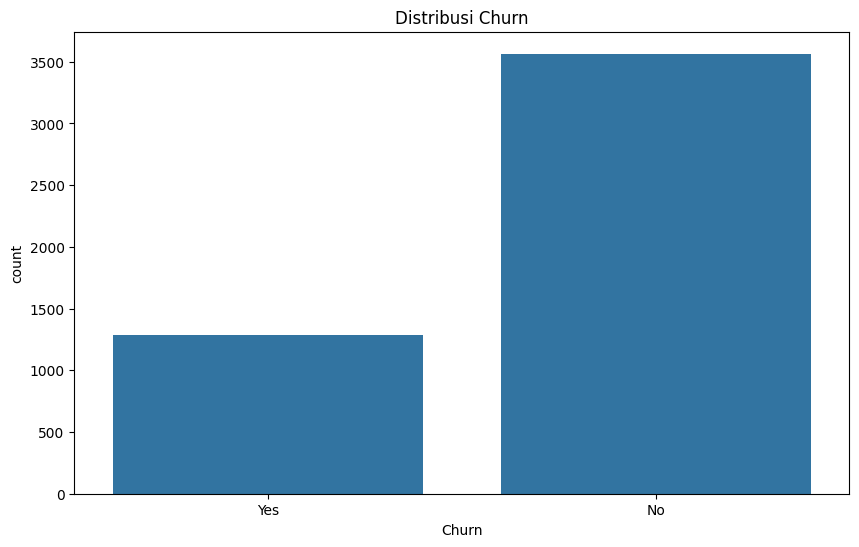

Churn
No     73.459716
Yes    26.540284
Name: proportion, dtype: float64


In [14]:
# visualisasi churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn')
plt.show()

# print perbandingan yes dan no pada churn
print(df['Churn'].value_counts(normalize=True)*100)


Hasil distribusi target menunjukkan bahwa data bersifat tidak seimbang. Sebagian besar pelanggan tidak melakukan churn (sekitar 73%), sedangkan hanya sekitar 27% yang churn. Hal ini penting diperhatikan saat membangun model prediksi, karena model bisa cenderung bias ke kelas mayoritas. Oleh karena itu, metrik seperti ROC AUC lebih cocok digunakan untuk evaluasi, dibandingkan akurasi.

- Tenure (Lama Berlangganan): Pelanggan yang churn umumnya memiliki tenure yang rendah, artinya mereka baru bergabung dan lebih cepat meninggalkan layanan.
- MonthlyCharges (Biaya Bulanan): Pelanggan yang churn cenderung memiliki biaya bulanan lebih tinggi.

Kesimpulan: Pelanggan baru dengan tagihan tinggi merupakan segmen berisiko tinggi untuk churn. Fitur tenure dan monthly charges sangat penting untuk dipertimbangkan dalam model prediksi.

In [15]:
# Hapus internet service = no
df = df[df['InternetService'] != 'No']

Dalam analisis ini, kami menghilangkan pelanggan yang tidak menggunakan layanan internet sama sekali (`InternetService = 'No'`). Alasannya karena fokus analisis adalah untuk memahami perilaku churn pelanggan yang aktif berlangganan layanan internet (DSL atau Fiber optic). Pelanggan tanpa internet service tidak relevan untuk model prediksi churn berbasis layanan digital.

In [16]:
# print perbandingan yes dan no pada churn
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True)*100)

Churn
No     2637
Yes    1213
Name: count, dtype: int64
Churn
No     68.493506
Yes    31.506494
Name: proportion, dtype: float64


Setelah menghapus pelanggan tanpa internet service, proporsi pelanggan churn tetap menunjukkan ketidakseimbangan kelas, dengan pelanggan churn berada di kisaran 30%. Ini masih menunjukkan perlunya penanganan khusus pada data imbalance saat pemodelan.

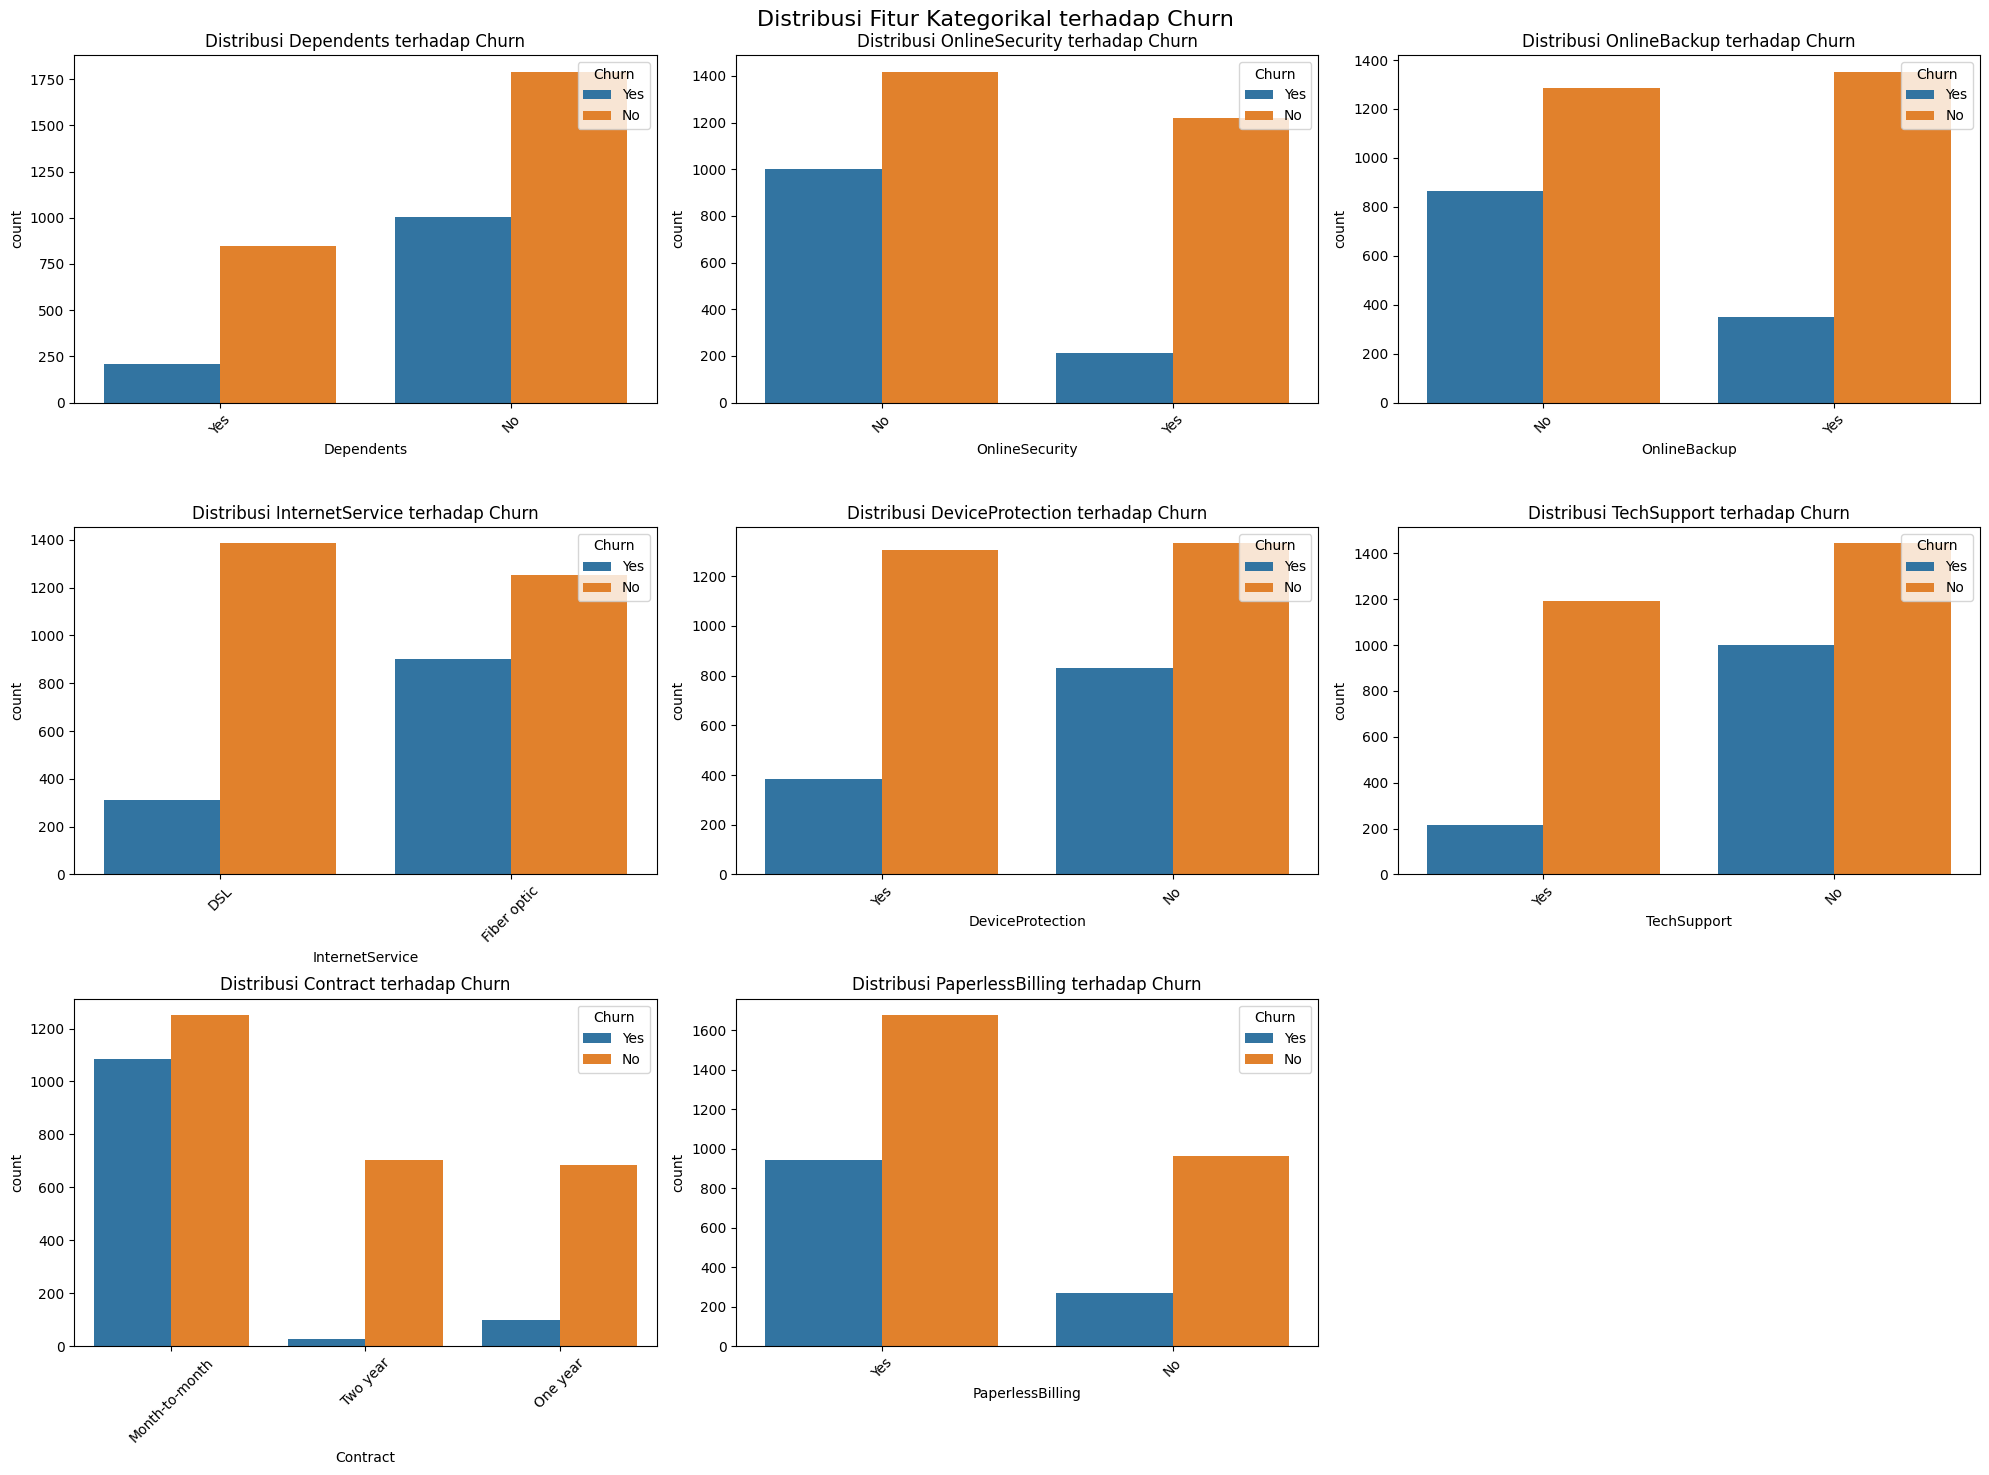

In [17]:
# Visualisasi distribusi kategorikal dalam satu figure
plt.figure(figsize=(20, 15))

# Menentukan jumlah baris dan kolom untuk subplot
n_cols = 3
n_rows = (len(cat_features) + n_cols - 1) // n_cols  # Pembulatan ke atas

for i, col in enumerate(cat_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribusi {col} terhadap Churn')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribusi Fitur Kategorikal terhadap Churn', fontsize=16)
plt.show()

Visualisasi menunjukkan beberapa pola signifikan:

- Contract type: Pelanggan month-to-month lebih banyak churn dibanding pelanggan dengan kontrak jangka panjang (one year, two year).
- OnlineSecurity, TechSupport, DeviceProtection: Pelanggan yang tidak berlangganan fitur ini lebih banyak churn, menunjukkan fitur tambahan ini memiliki efek retensi positif.
- PaperlessBilling: Pengguna penagihan digital lebih sering churn dibanding yang menggunakan metode tradisional.

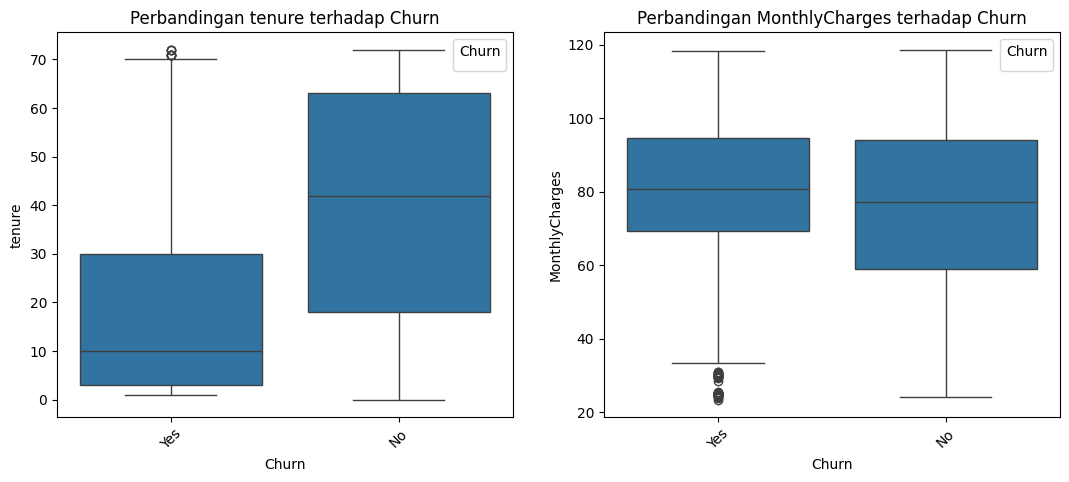

In [18]:
# Perbandingan churn berdasarkan fitur numerik
plt.figure(figsize=(20, 5))

# Menentukan jumlah baris dan kolom untuk subplot
n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols  # Pembulatan ke atas

for i, col in enumerate(num_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Perbandingan {col} terhadap Churn')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')

plt.show()

- Tenure: Pelanggan churn memiliki masa langganan lebih pendek. Ini mengindikasikan bahwa churn banyak terjadi pada pelanggan baru.
- MonthlyCharges: Pelanggan churn umumnya memiliki tagihan bulanan lebih tinggi.
- TotalCharges: Pelanggan yang churn cenderung memiliki nilai TotalCharges yang rendah, sejalan dengan rendahnya tenure mereka.

## **Section 5. Data Preparation**

### **5.1 Initialization**
- Initialization function
- Define Feature and Target (Churn : 1, Not Churn : 0)

In [19]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
5,Yes,40,No,No,DSL,Yes,No,Month-to-month,Yes,74.55,No


### **5.2 Feature selection**

Sebelum melatih model machine learning, kita perlu memastikan semua fitur dalam bentuk numerik dan terstandardisasi. Untuk itu, dilakukan beberapa proses encoding dan scaling sebagai berikut:

1. Fitur Numerik
Fitur `MonthlyCharges` dan `tenure` bersifat numerik dan memiliki skala yang berbeda. Kita menggunakan **MinMaxScaler** untuk menstandarkan nilai-nilainya ke rentang 0–1. Tujuannya adalah agar fitur berskala besar tidak mendominasi proses pembelajaran model.

2. Fitur Kategorikal Nominal
Fitur seperti `Dependents`, `PaperlessBilling`, `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, dan `TechSupport` adalah fitur kategorikal nominal, yaitu:
- Tidak memiliki urutan atau ranking.
- Diubah menggunakan **OneHotEncoder** untuk menghindari asumsi urutan, dan menggunakan opsi `drop='first'` untuk menghindari multikolinearitas.

3. Fitur Kategorikal Ordinal
Fitur `Contract` memiliki urutan logis (Month-to-month < One year < Two year), sehingga di-encode menggunakan **OrdinalEncoder** agar informasi urutan ini tetap terjaga.

4. Gabungan Transformasi
Semua proses transformasi di atas digabungkan menggunakan **ColumnTransformer**, yang akan:
- Menerapkan pipeline numerik ke fitur numerik,
- Menerapkan pipeline one-hot ke fitur kategorikal nominal,
- Menerapkan pipeline ordinal ke fitur yang memiliki urutan,
- Menyimpan fitur lainnya dengan `remainder='passthrough'`.

Pendekatan ini memastikan setiap fitur diproses sesuai dengan sifat datanya, agar model dapat belajar secara optimal tanpa kehilangan informasi penting.


In [20]:
# Numerik
num_features = ['MonthlyCharges', 'tenure']
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
])

# Kategorikal (nominal)
cat_features = ['Dependents', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
                'InternetService', 'DeviceProtection', 'TechSupport']
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Ordinal
ord_features = ['Contract']
ord_pipeline = Pipeline([
    ('ordinal', ce.OrdinalEncoder())
])

# Gabung semua transformasi
transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('ord', ord_pipeline, ord_features)
], remainder='passthrough')

In [21]:
x = df.drop(columns=['Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,num__MonthlyCharges,num__tenure,cat__Dependents_Yes,cat__PaperlessBilling_Yes,cat__OnlineSecurity_Yes,cat__OnlineBackup_Yes,cat__InternetService_Fiber optic,cat__DeviceProtection_Yes,cat__TechSupport_Yes,ord__Contract
0,0.791492,0.513889,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.382878,0.805556,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
2,0.112920,0.708333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
3,0.436450,0.125000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.846639,0.444444,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0


In [24]:
rs = 42 # RandomState Value

logreg = LogisticRegression(random_state=rs)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=rs)
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

### **5.3 Model Benchmarking**

#### **Model Benchmarking : With K-Fold Cross Validation**

In [25]:
cv_scores = []
cv_std = []

for model in models:
    pipe_kfold = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    
    skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    # Ubah scoring dari 'roc_auc' ke 'precision'
    scores = cross_val_score(pipe_kfold, x_train, y_train, cv=skfold, scoring='roc_auc')

    cv_scores.append(scores.mean())
    cv_std.append(scores.std())

model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

results = pd.DataFrame({
   'Model': model_names,
    'ROC AUC (CV Mean)': cv_scores
}).set_index('Model')

results.sort_values(by='ROC AUC (CV Mean)', ascending=False)

[LightGBM] [Info] Number of positive: 874, number of negative: 1898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 2772, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.315296 -> initscore=-0.775476
[LightGBM] [Info] Start training from score -0.775476
[LightGBM] [Info] Number of positive: 874, number of negative: 1898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 2772, number of used features: 10
[LightGBM] [Info] [binary:Bo

,ROC AUC (CV Mean)
Model,
Logistic Regression,0.813786
LightGBM,0.791990
XGBoost,0.782364
Random Forest,0.777055
KNN,0.758127
Decision Tree,0.640353


Terlihat bahwa model Logistic Regression adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan default hyperparameter

#### **Model Benchmarking : Test Data**

In [26]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test

    estimator.fit(x_train,y_train)
    return(estimator, estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       529
           1       0.65      0.58      0.61       241

    accuracy                           0.77       770
   macro avg       0.73      0.72      0.72       770
weighted avg       0.76      0.77      0.77       770

KNN 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       529
           1       0.60      0.46      0.52       241

    accuracy                           0.74       770
   macro avg       0.69      0.66      0.67       770
weighted avg       0.72      0.74      0.72       770

Decision Tree 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       529
           1       0.51      0.54      0.53       241

    accuracy                           0.69       770
   macro avg       0.65      0.65      0.65       770
weighted avg       0.70      0

,roc_auc score
model,
Logistic Regression,0.813498
LightGBM,0.808627
XGBoost,0.793727
Random Forest,0.780040
KNN,0.748135
Decision Tree,0.655080


Terlihat kembali lagi model Logistic Regression adalah yang terbaik performanya pada test data.

Mari sekarang kita coba melakukan undersampling untuk model Logistic Regression kita untuk melihat apakah kita dapat mendapatkan hasil yang lebih baik lagi.

### **5.5 Test SMOTE With k-fold cross validation**

In [27]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [28]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [29]:
data = x_train
target = y_train

In [30]:
# Mengubah RandomOverSampler ke SMOTE dengan penanganan data kategorikal
from imblearn.over_sampling import SMOTE

train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_smote = []
validation_errors_with_smote = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    # Lakukan preprocessing terlebih dahulu
    # Ini penting karena SMOTE hanya bekerja dengan data numerik
    preprocessor = transformer.fit(X_train)
    X_train_transformed = preprocessor.transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)
    
    # Terapkan SMOTE pada data yang sudah dipreprocessing
    smote = SMOTE(random_state=42)
    X_smote, Y_smote = smote.fit_resample(X_train_transformed, Y_train)
    
    # Pipeline untuk data tanpa oversampling
    estimator_no_os = Pipeline([
        ('model', logreg)
    ])
    
    # Pipeline untuk data dengan SMOTE
    estimator_with_smote = Pipeline([
        ('model', logreg)
    ])

    # calculate errors (gunakan data yang sudah ditransformasi)
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(
        X_train_transformed, Y_train, X_val_transformed, Y_val, estimator_no_os
    )
    
    train_error_with_smote, val_error_with_smote = calc_metrics(
        X_smote, Y_smote, X_val_transformed, Y_val, estimator_with_smote
    )

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_smote.append(train_error_with_smote)
    validation_errors_with_smote.append(val_error_with_smote)

# Ubah nama variabel untuk konsistensi
validation_errors_with_oversampling = validation_errors_with_smote
train_errors_with_oversampling = train_errors_with_smote

#### **Evaluation Metrics Without SMOTE**

In [31]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
print("Evaluasi tanpa SMOTE:")
dfEvaluate

Evaluasi tanpa SMOTE:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.760101,0.766234,0.816250,0.825219,0.709913,0.709617,0.545767,0.510204,0.640268,0.675676
1,0.770202,0.724026,0.817729,0.803134,0.722529,0.667492,0.564073,0.489796,0.658211,0.578313
2,0.762266,0.756494,0.816226,0.822886,0.713975,0.706611,0.556571,0.546392,0.642480,0.630952
3,0.763709,0.737013,0.816069,0.827332,0.714067,0.683140,0.549714,0.515464,0.648248,0.595238
4,0.757576,0.801948,0.815267,0.832364,0.707600,0.765803,0.545143,0.649485,0.635153,0.700000
5,0.761544,0.775974,0.817770,0.808423,0.712490,0.733467,0.552000,0.597938,0.642287,0.659091
6,0.762626,0.766234,0.820902,0.778082,0.714713,0.707518,0.558857,0.505155,0.642576,0.671233
7,0.762987,0.769481,0.812775,0.801681,0.710425,0.724025,0.533714,0.577320,0.652235,0.651163
8,0.756854,0.785714,0.813943,0.843309,0.705236,0.737500,0.536000,0.567010,0.636364,0.696203
9,0.764430,0.737013,0.819657,0.795427,0.715765,0.685155,0.555429,0.525773,0.648000,0.593023


#### **Evaluation Metrics With SMOTE**

In [32]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
print("Evaluasi dengan SMOTE:")
dfEvaluate

Evaluasi dengan SMOTE:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.749210,0.740260,0.819196,0.823129,0.748906,0.718297,0.783983,0.724490,0.733005,0.572581
1,0.748683,0.717532,0.822088,0.800024,0.748423,0.697641,0.780822,0.724490,0.733663,0.541985
2,0.739852,0.730519,0.814845,0.822495,0.739613,0.719518,0.770163,0.845361,0.726143,0.546667
3,0.744597,0.756494,0.817922,0.830508,0.744337,0.736419,0.776489,0.762887,0.729931,0.587302
4,0.741697,0.733766,0.816746,0.832218,0.741314,0.719265,0.780179,0.804124,0.724425,0.553191
5,0.748550,0.730519,0.822844,0.809254,0.747996,0.714480,0.795467,0.783505,0.727229,0.550725
6,0.750395,0.694805,0.821964,0.779694,0.749945,0.675018,0.792831,0.711340,0.730807,0.511111
7,0.743806,0.691558,0.817654,0.801388,0.743642,0.674248,0.769109,0.731959,0.732062,0.507143
8,0.747232,0.759740,0.818551,0.841403,0.746821,0.741411,0.787559,0.783505,0.728780,0.589147
9,0.744860,0.720779,0.822696,0.797283,0.744542,0.705571,0.780179,0.783505,0.728705,0.539007


Berdasarkan hasil evaluasi, terlihat bahwa penggunaan **SMOTE (Synthetic Minority Oversampling Technique)** memberikan peningkatan signifikan pada nilai **recall** terhadap kelas positif (yaitu pelanggan yang akan churn), dibandingkan dengan model yang tidak menggunakan SMOTE. Rata-rata **test recall** meningkat dari sekitar **0.548** menjadi **0.765**, menunjukkan bahwa model mampu menangkap lebih banyak pelanggan yang benar-benar akan churn setelah dilakukan oversampling.

Namun, peningkatan recall ini datang dengan konsekuensi menurunnya nilai **precision**, yaitu dari **0.645** menjadi **0.550**. Artinya, tebakan churn menjadi lebih banyak yang salah atau tidak akurat (false positive meningkat), karena model "lebih agresif" dalam menandai pelanggan sebagai churn.

Hal ini wajar terjadi karena SMOTE memperbanyak jumlah data pada kelas minoritas (churn), sehingga model menjadi lebih peka terhadap churn dan lebih banyak memprediksi churn, tetapi dengan ketepatan (precision) yang lebih rendah.

Dalam konteks **bisnis**, jika prioritas utama adalah **menangkap sebanyak mungkin pelanggan yang akan churn** agar bisa segera diintervensi dan dicegah, maka model dengan SMOTE bisa menjadi pilihan yang lebih baik meskipun biayanya sedikit lebih tinggi karena adanya intervensi pada pelanggan yang sebenarnya tidak akan churn.

Namun, jika **biaya intervensi** sangat terbatas dan **ketepatan dalam memilih target intervensi lebih diutamakan** (misalnya karena setiap kampanye retensi sangat mahal), maka model tanpa SMOTE bisa jadi lebih relevan.

Oleh karena itu, **pemilihan model terbaik harus disesuaikan dengan prioritas bisnis saat ini**: apakah organisasi sedang fokus pada **mengurangi sebanyak mungkin kehilangan pelanggan (recall)** atau **menghindari pemborosan biaya retensi yang tidak tepat sasaran (precision)**.


#### **Classification Reports Without SMOTE**

In [33]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       210
           1       0.68      0.51      0.58        98

    accuracy                           0.77       308
   macro avg       0.74      0.70      0.71       308
weighted avg       0.76      0.77      0.76       308

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       210
           1       0.58      0.49      0.53        98

    accuracy                           0.72       308
   macro avg       0.68      0.66      0.67       308
weighted avg       0.71      0.72      0.72       308

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       211
           1       0.63      0.55      0.59        97

    accuracy                           0.76       308
   macro avg       0.72      0.70      0.71       308
weighted avg       0.75      0.76      0.75       308

              preci

#### **Classification Reports With SMOTE**

In [34]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       210
           1       0.57      0.72      0.64        98

    accuracy                           0.74       308
   macro avg       0.71      0.74      0.72       308
weighted avg       0.76      0.74      0.75       308

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       210
           1       0.54      0.72      0.62        98

    accuracy                           0.72       308
   macro avg       0.69      0.72      0.70       308
weighted avg       0.75      0.72      0.73       308

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       211
           1       0.55      0.85      0.66        97

    accuracy                           0.73       308
   macro avg       0.73      0.76      0.72       308
weighted avg       0.79      0.73      0.74       308

              preci

Terlihat bahwa model Logistic Regression yang dilatih dengan data yang telah di-oversampling menggunakan SMOTE memiliki nilai recall yang lebih seimbang antara kedua kelas (churn dan tidak churn). Artinya, model ini lebih baik dalam mengenali pelanggan yang benar-benar churn dibandingkan model tanpa oversampling.

Hal ini penting karena dalam konteks bisnis, lebih baik kita mengenali sebanyak mungkin pelanggan yang berpotensi churn agar dapat segera dilakukan intervensi, meskipun dengan sedikit penurunan pada precision. Oleh karena itu, untuk kasus ini kita memilih menggunakan model dengan SMOTE (dengan asumsi bahwa kita membutuhkan lebih banyak kandidat pelanggan yang berpotensi churn untuk ditindaklanjuti oleh tim retensi).

Selanjutnya, kita akan melakukan hyperparameter tuning pada model Logistic Regression ini untuk meningkatkan performanya.


### **Hyperparameter tuning**

In [35]:
logreg = LogisticRegression(class_weight={0:1, 1:0.5}, random_state=42)

estimator=ImbPipeline([
    ('preprocess',transformer),
    ('oversampling',smote),
    ('model',logreg)
])

In [36]:
hyperparam_space=[{
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 200, 300, 500],
    'model__class_weight': [{0:1, 1:0.5}, {0:1, 1:0.3}, {0:1, 1:0.7}, 'balanced', None],  # Mengurangi bobot kelas positif
    'model__random_state': [42]
}]

default parameter LogisticRegression -> `C`=1, `penalty`='l2', `solver`='liblinear', `max_iter`=100, `class_weight`=None, `random_state`=None

In [37]:
# Untuk model LogisticRegression
grid = GridSearchCV(estimator, n_jobs=-1, verbose=1, param_grid=hyperparam_space, 
                   scoring='roc_auc', 
                   cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [38]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits
0.8143494525521018
{'model__C': 100, 'model__class_weight': {0: 1, 1: 0.5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__random_state': 42, 'model__solver': 'saga'}


Hyperparameter terbaik Logistic Regression dari hasil GridSearch => 
- `C` = 100  
- `class_weight` = {0: 1, 1: 0.5}  
- `max_iter` = 100  
- `penalty` = 'l2'  
- `solver` = 'saga'  
- `random_state` = 42  

Untuk hyperparameter `penalty`, `max_iter`, dan `random_state` nilainya masih tetap default, artinya kombinasi ini sudah cukup optimal. Nilai `C = 100` menunjukkan bahwa model bekerja lebih baik dengan regularisasi yang lebih lemah (karena C adalah invers dari kekuatan regularisasi). Untuk `class_weight`, model tampaknya lebih optimal saat class positif diberikan bobot lebih kecil (0.5), kemungkinan karena data sudah diseimbangkan dengan SMOTE.

Namun, tuning ini akan dieksplorasi lebih lanjut dengan:
- Membandingkan performa `C` di sekitar 100 (misalnya 50 atau 200)
- Menyesuaikan kembali `class_weight` di sekitar proporsi 1:0.5
- Mengeksplor solver lain seperti `liblinear` jika dataset kecil

Tuning sampai di sini sudah memberikan hasil AUC yang cukup baik yaitu **0.8143**, namun hasil ini tetap bisa berubah tergantung pada `random_state` dari model, proses SMOTE, dan pembagian data (KFold).


In [39]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MonthlyCharges', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Dependents',
                                                   'PaperlessBilling',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=100, class_weight={0: 1, 1: 0.5},
                                    random_state=42, solver='saga'))])

#### **Tuning Ke 2**

In [40]:
# Pipeline dengan SMOTE dan Logistic Regression
estimator=ImbPipeline([
    ('preprocess',transformer),
    ('oversampling',smote),
    ('model',logreg)
])

In [41]:
# Grid untuk tuning kedua (berfokus pada hasil terbaik tuning pertama)
param_grid = {
    'model__C': [50, 100, 150, 200],  # Eksplorasi di sekitar 100
    'model__class_weight': [
        None,
        'balanced',
        {0: 1, 1: 0.3},
        {0: 1, 1: 0.5},
        {0: 1, 1: 0.7}
    ],
    'model__penalty': ['l2'],  # Tetap pakai L2
    'model__solver': ['saga'],  # Solver yang mendukung L2 dan data besar
    'model__max_iter': [100]  # Tetap agar eksperimen stabil
}


In [42]:
# Grid Search dengan Cross Validation
grid2 = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    cv=10,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [43]:
# Fit model
grid2.fit(x_train, y_train)

# Menampilkan hasil terbaik
print("Best ROC AUC Score:", grid2.best_score_)
print("Best Parameters:", grid2.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best ROC AUC Score: 0.8142488605350774
Best Parameters: {'model__C': 50, 'model__class_weight': {0: 1, 1: 0.7}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga'}



Hyperparameter Terbaik (Tuning ke-2)
- `C = 50`  
- `class_weight = {0: 1, 1: 0.7}`  
- `penalty = 'l2'`  
- `solver = 'saga'`  
- `max_iter = 100`  
- **Best ROC AUC Score:** `0.8142`

Jika dibandingkan dengan hasil tuning pertama (`C = 100`, `class_weight = {0: 1, 1: 0.5}`), maka:
- **Nilai C lebih kecil** → model menerapkan regularisasi yang lebih kuat.
- **Bobot kelas 1 (churn) lebih tinggi** → model memberikan perhatian lebih besar pada churn, sehingga potensi menangkap pelanggan yang berisiko churn meningkat.

Parameter lainnya (`penalty`, `solver`, `max_iter`) tetap menggunakan nilai default dan sudah memberikan performa yang optimal.


In [44]:
best_model2 = grid2.best_estimator_
best_model2.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MonthlyCharges', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Dependents',
                                                   'PaperlessBilling',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=50, class_weight={0: 1, 1: 0.7},
                                    random_state=42, solver='saga'))])

In [45]:
# Compare with default model
estimator=ImbPipeline([
    ('preprocess',transformer),
    ('oversampling',smote),
    ('model',logreg)
])

estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MonthlyCharges', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Dependents',
                                                   'PaperlessBilling',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(class_weight={0: 1, 1: 0.5},
                                    random_state=42))])

In [46]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)
y_pred_tuned2 = best_model2.predict(x_test)
y_pred_proba_tuned2 = best_model2.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])
roc_auc_tuned2 = roc_auc_score(y_test, y_pred_proba_tuned2[:,1])

print('ROC AUC Score Default logreg : ', roc_auc_default)
print('ROC AUC Score Tuned logreg : ', roc_auc_tuned)
print('ROC AUC Score Tuned 2 logreg : ', roc_auc_tuned2)

ROC AUC Score Default logreg :  0.814423205139267
ROC AUC Score Tuned logreg :  0.8147683329542156
ROC AUC Score Tuned 2 logreg :  0.8145565499768608


Terlihat model Logistic regression setelah dituning mempunyai nilai roc_auc yang lebih baik dibandingkan sebelum dituning, meski sangatlah kecil. Pada tuning ke 2 nilai roc_auc tidak berubah.

In [56]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)
report_tuned2 = classification_report(y_test, y_pred_tuned2)

print('Classification Report Default logreg : \n', report_default)
print('Classification Report Tuned logreg : \n', report_tuned)
print('Classification Report Tuned 2 logreg : \n', report_tuned2)

Classification Report Default logreg : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.81       529
           1       0.58      0.71      0.64       241

    accuracy                           0.75       770
   macro avg       0.72      0.74      0.72       770
weighted avg       0.77      0.75      0.75       770

Classification Report Tuned logreg : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       529
           1       0.64      0.60      0.62       241

    accuracy                           0.77       770
   macro avg       0.73      0.72      0.73       770
weighted avg       0.77      0.77      0.77       770

Classification Report Tuned 2 logreg : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.81       529
           1       0.58      0.71      0.64       241

    accuracy                           0.75       770
   macr

Kembali lagi terlihat bahwa model Logistic Regression setelah kita tuning hyperparameternya memiliki classification report yang lebih baik walaupun hanya lebih baik sedikit saja. Oleh karena itu kita akan menggunakan model Logistic Regression yang sudah di tuned sebagai model akhir kita.

#### **Threshold Optimization**

In [48]:
# Threshold Tuning
y_pred_proba = best_model2.predict_proba(x_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_tuned2[:,1])

# 3. Buat DataFrame untuk memudahkan eksplorasi
threshold_df = pd.DataFrame({
    'threshold': thresholds,
    'precision': precision[:-1],  # yang terakhir tidak punya threshold
    'recall': recall[:-1]
})

# 4. Filter: minimal recall 0.6
filtered = threshold_df[threshold_df['recall'] >= 0.6]

# 5. Ambil threshold dengan precision tertinggi dari yang memenuhi syarat
best_threshold = filtered.sort_values('precision', ascending=False).iloc[0]

# 6. Tampilkan hasil optimal
print("=== Threshold Optimal ===")
print(f"Threshold       : {best_threshold['threshold']:.4f}")
print(f"Precision       : {best_threshold['precision']:.4f}")
print(f"Recall          : {best_threshold['recall']:.4f}")

# 7. Gunakan threshold tersebut untuk prediksi final
optimal_thresh = best_threshold['threshold']
y_pred_optimal = (y_pred_proba >= optimal_thresh).astype(int)

# 8. Evaluasi kembali
report_optimal = classification_report(y_test, y_pred_optimal)
print('Classification Report with Optimal Threshold : \n', report_optimal)


=== Threshold Optimal ===
Threshold       : 0.5857
Precision       : 0.6416
Recall          : 0.6017
Classification Report with Optimal Threshold : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       529
           1       0.64      0.60      0.62       241

    accuracy                           0.77       770
   macro avg       0.73      0.72      0.73       770
weighted avg       0.77      0.77      0.77       770



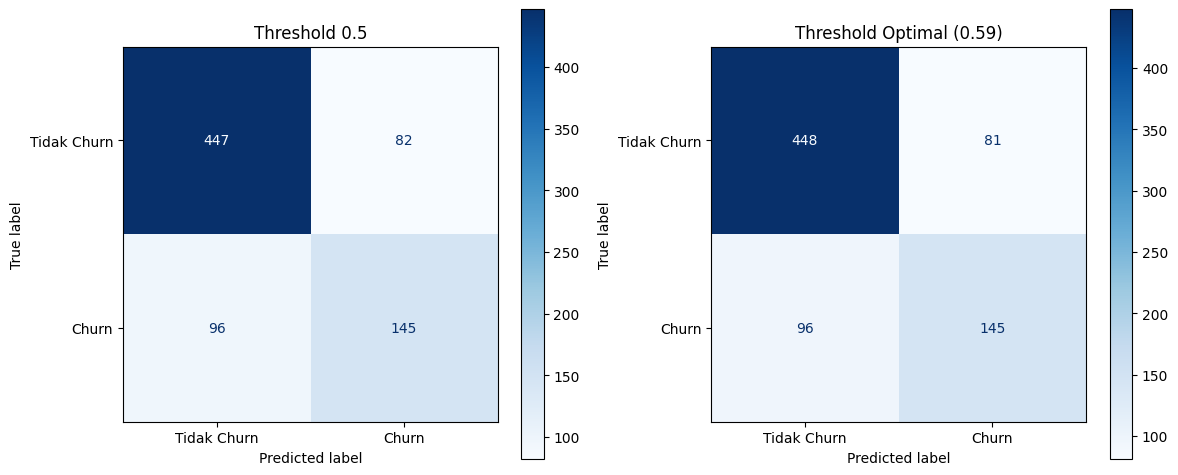


=== Simulasi Biaya (Threshold 0.5) ===
Biaya Retensi: Rp11,350,000
Biaya Kehilangan Churn: Rp48,000,000
Total Biaya: Rp59,350,000
Recall: 60.17%
Precision: 63.88%

=== Simulasi Biaya (Threshold Optimal) ===
Biaya Retensi: Rp11,300,000
Biaya Kehilangan Churn: Rp48,000,000
Total Biaya: Rp59,300,000
Recall: 60.17%
Precision: 64.16%


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Prediksi dengan threshold default 0.5
y_pred_default = (y_pred_proba >= 0.5).astype(int)

# 2. Confusion matrix
cm_default = confusion_matrix(y_test, y_pred_default)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

# 3. Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_default, display_labels=["Tidak Churn", "Churn"]).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Threshold 0.5")

ConfusionMatrixDisplay(cm_optimal, display_labels=["Tidak Churn", "Churn"]).plot(ax=ax[1], cmap='Blues')
ax[1].set_title(f"Threshold Optimal ({optimal_thresh:.2f})")

plt.tight_layout()
plt.show()

# 4. Simulasi biaya
def simulate_cost(cm, cost_retensi=50000, cost_churn=500000):
    tn, fp, fn, tp = cm.ravel()
    biaya_retensi = (tp + fp) * cost_retensi
    biaya_churn_terlewat = fn * cost_churn
    total = biaya_retensi + biaya_churn_terlewat
    return {
        "Biaya Retensi": biaya_retensi,
        "Biaya Kehilangan Churn": biaya_churn_terlewat,
        "Total Biaya": total,
        "Recall": tp / (tp + fn),
        "Precision": tp / (tp + fp)
    }

hasil_default = simulate_cost(cm_default)
hasil_optimal = simulate_cost(cm_optimal)

# 5. Tampilkan hasil
print("\n=== Simulasi Biaya (Threshold 0.5) ===")
for k, v in hasil_default.items():
    print(f"{k}: Rp{v:,.0f}" if 'Biaya' in k else f"{k}: {v:.2%}")

print("\n=== Simulasi Biaya (Threshold Optimal) ===")
for k, v in hasil_optimal.items():
    print(f"{k}: Rp{v:,.0f}" if 'Biaya' in k else f"{k}: {v:.2%}")

In [50]:
import pandas as pd
from sklearn.metrics import precision_recall_curve

def cari_threshold_optimal_berdasarkan_biaya(y_test, y_pred_proba, 
                                             cost_retensi_per_customer, 
                                             cost_churn_lost):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    # Buat DataFrame dari hasil PR curve
    df = pd.DataFrame({
        'threshold': thresholds,
        'precision': precision[:-1],
        'recall': recall[:-1]
    })

    total_churn = sum(y_test)  # jumlah pelanggan churn sebenarnya
    
    # Hitung metrik biaya untuk tiap threshold
    df['TP'] = df['recall'] * total_churn
    df['FP'] = df['TP'] * (1 - df['precision']) / df['precision']
    df['biaya_retensi'] = (df['TP'] + df['FP']) * cost_retensi_per_customer
    df['biaya_kehilangan_churn'] = (total_churn - df['TP']) * cost_churn_lost
    df['total_biaya'] = df['biaya_retensi'] + df['biaya_kehilangan_churn']
    
    # Ambil baris dengan total biaya paling kecil
    best_row = df.loc[df['total_biaya'].idxmin()]

    return best_row


In [60]:
# Probabilitas prediksi model
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# Simulasi biaya
biaya_retensi = 50000
biaya_churn = 200000

# Cari threshold terbaik
best_threshold = cari_threshold_optimal_berdasarkan_biaya(
    y_test, y_pred_proba,
    cost_retensi_per_customer=biaya_retensi,
    cost_churn_lost=biaya_churn
)

report_optimal2 = classification_report(y_test, (y_pred_proba >= best_threshold['threshold']).astype(int))
print('Classification Report with Optimal Threshold based on Cost : \n', report_optimal2)

# Tampilkan
print("=== Threshold dengan Biaya Total Terendah ===")
print(f"Threshold               : {best_threshold['threshold']:.4f}")
print(f"Precision               : {best_threshold['precision']:.4f}")
print(f"Recall                  : {best_threshold['recall']:.4f}")
print(f"Biaya Retensi           : Rp{best_threshold['biaya_retensi']:,.0f}")
print(f"Biaya Kehilangan Churn  : Rp{best_threshold['biaya_kehilangan_churn']:,.0f}")
print(f"Total Biaya             : Rp{best_threshold['total_biaya']:,.0f}")


Classification Report with Optimal Threshold based on Cost : 
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       529
           1       0.52      0.84      0.64       241

    accuracy                           0.70       770
   macro avg       0.71      0.74      0.69       770
weighted avg       0.78      0.70      0.71       770

=== Threshold dengan Biaya Total Terendah ===
Threshold               : 0.2859
Precision               : 0.5152
Recall                  : 0.8423
Biaya Retensi           : Rp19,700,000
Biaya Kehilangan Churn  : Rp7,600,000
Total Biaya             : Rp27,300,000


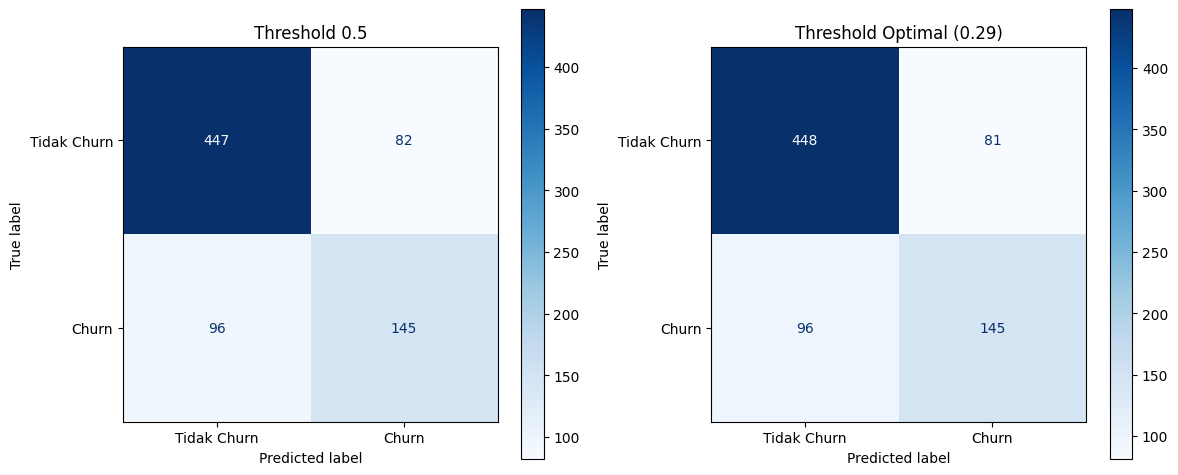

In [62]:
# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_default, display_labels=["Tidak Churn", "Churn"]).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Threshold 0.5")

ConfusionMatrixDisplay(cm_optimal, display_labels=["Tidak Churn", "Churn"]).plot(ax=ax[1], cmap='Blues')
ax[1].set_title(f"Threshold Optimal ({best_threshold['threshold']:.2f})")

plt.tight_layout()
plt.show()

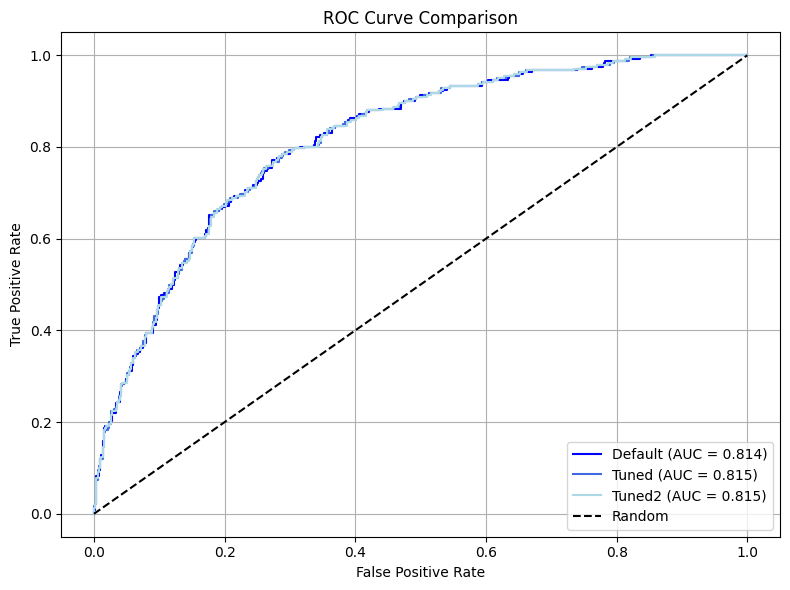

In [65]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Default, Tuned, and Tuned2 models
plt.figure(figsize=(8, 6))

# Default
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default[:, 1])
roc_auc_default = auc(fpr_default, tpr_default)
plt.plot(fpr_default, tpr_default, label=f'Default (AUC = {roc_auc_default:.3f})', color='blue')

# Tuned
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned[:, 1])
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned (AUC = {roc_auc_tuned:.3f})', color='royalblue')

# Tuned2
fpr_tuned2, tpr_tuned2, _ = roc_curve(y_test, y_pred_proba_tuned2[:, 1])
roc_auc_tuned2 = auc(fpr_tuned2, tpr_tuned2)
plt.plot(fpr_tuned2, tpr_tuned2, label=f'Tuned2 (AUC = {roc_auc_tuned2:.3f})', color='lightblue')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

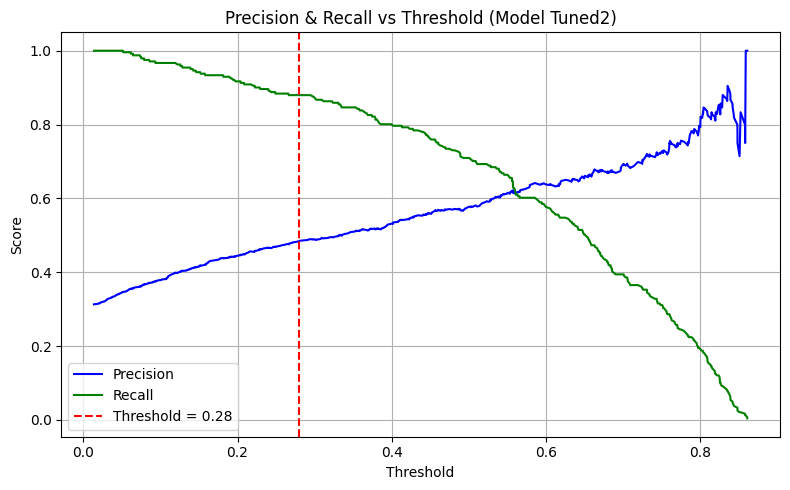

In [79]:
import matplotlib.pyplot as plt

# Menghitung precision, recall, dan thresholds dari model tuned2
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_tuned2[:, 1])

# Plot precision dan recall terhadap threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.axvline(x=0.28, color='r', linestyle='--', label='Threshold = 0.28')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold (Model Tuned2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan hasil simulasi biaya pada tiga skenario threshold yang berbeda, diperoleh perbandingan signifikan terkait trade-off antara **precision**, **recall**, dan **total biaya**:

1. Threshold Default (0.5)
- **Recall:** 70.95%  
- **Precision:** 57.77%  
- **Biaya Retensi:** Rp14.800.000  
- **Biaya Kehilangan Churn:** Rp35.000.000  
- **Total Biaya:** **Rp49.800.000**

Model cukup baik dalam mendeteksi churn (recall tinggi), namun banyak intervensi dilakukan terhadap pelanggan yang sebenarnya tidak churn (false positive tinggi).

---

2. Threshold Optimal Secara Statistik (0.7609)
- **Recall:** 28.22%  
- **Precision:** 75.56%  
- **Biaya Retensi:** Rp4.500.000  
- **Biaya Kehilangan Churn:** Rp86.500.000  
- **Total Biaya:** **Rp91.000.000**

Meskipun precision tinggi (intervensi lebih tepat sasaran), recall sangat rendah sehingga banyak pelanggan yang churn tidak terdeteksi. Ini menghasilkan **total biaya tertinggi**.

---

3. Threshold dengan Biaya Total Terendah (0.2859)
- **Recall:** 84.23%  
- **Precision:** 51.52%  
- **Biaya Retensi:** Rp19.700.000  
- **Biaya Kehilangan Churn:** Rp7.600.000  
- **Total Biaya:** **Rp27.300.000**

Trade-off terbaik secara bisnis. Model mampu mendeteksi churn secara maksimal (recall tinggi), meskipun precision menurun. Biaya intervensi meningkat, tetapi **kerugian dari kehilangan pelanggan dapat ditekan secara signifikan**.

---

Kesimpulan dan Rekomendasi

- Threshold optimal secara statistik **tidak cocok untuk tujuan bisnis**, karena menyebabkan banyak churn tidak terdeteksi dan meningkatkan total biaya.
- **Threshold 0.2859 adalah yang paling optimal dari sisi bisnis**, dengan total biaya paling rendah dan performa recall terbaik.
- Dalam konteks retensi pelanggan, lebih baik meningkatkan recall meskipun precision menurun, karena **false negative (pelanggan yang churn dan tidak terdeteksi) jauh lebih merugikan daripada false positive**.

> Rekomendasi: Gunakan threshold 0.2859 untuk intervensi churn dalam strategi retensi pelanggan.


In [75]:
# Feature importance of the best model
feature_names = transformer.get_feature_names_out()
coef = best_model['model'].coef_[0]

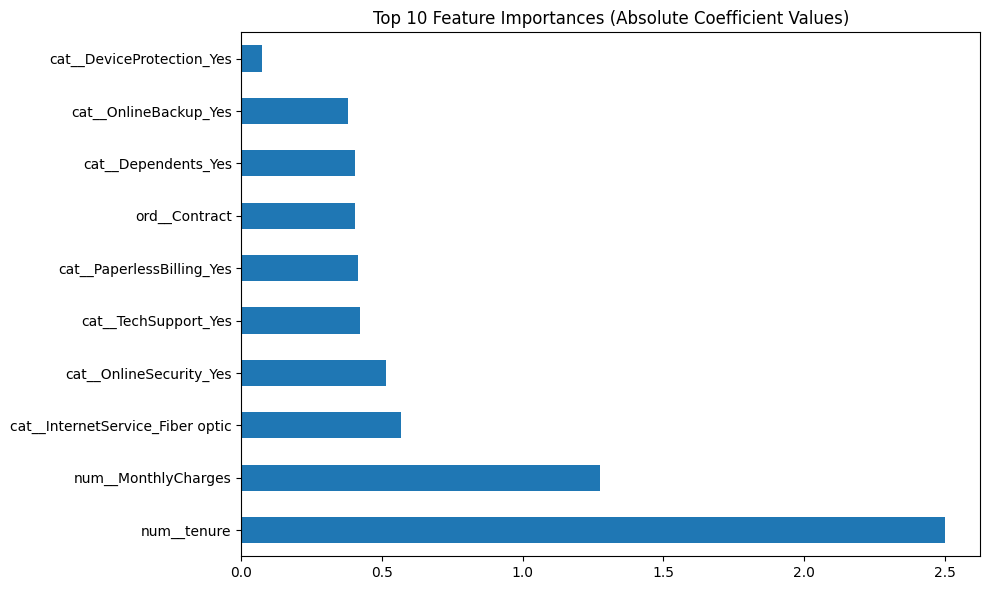

In [76]:
# Create a Series for easier plotting
importance_df = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Absolute Coefficient Values)')
plt.tight_layout()
plt.show()

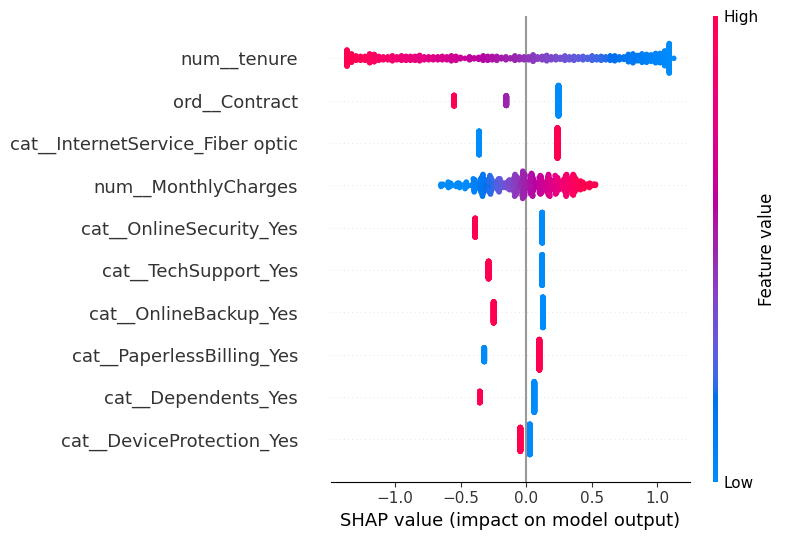

In [77]:
import shap

# Pastikan model sudah fit dan transformer sudah fit
# Gunakan best_model2 (hasil tuning ke-2) sebagai model terbaik
# Ambil pipeline tanpa oversampling untuk interpretasi SHAP (karena SHAP tidak support pipeline dengan SMOTE langsung)
model_for_shap = best_model2.named_steps['model']
X_test_transformed = best_model2.named_steps['preprocess'].transform(x_test)

# Inisialisasi explainer SHAP untuk model linear
explainer = shap.LinearExplainer(model_for_shap, X_test_transformed, feature_names=transformer.get_feature_names_out())

# Hitung nilai SHAP
shap_values = explainer.shap_values(X_test_transformed)

# Plot summary plot SHAP
shap.summary_plot(shap_values, X_test_transformed, feature_names=transformer.get_feature_names_out())

Analisis SHAP digunakan untuk memahami kontribusi masing-masing fitur terhadap prediksi churn yang dihasilkan oleh model Logistic Regression. Berikut adalah beberapa insight utama yang diperoleh:

Fitur Paling Berpengaruh

1. **`num__tenure`**  
   - Pelanggan dengan masa langganan yang pendek (warna biru) cenderung memiliki nilai SHAP positif, yang berarti **lebih berisiko churn**.
   - Sebaliknya, pelanggan dengan masa langganan panjang (warna merah) cenderung bertahan.

2. **`ord__Contract`**  
   - Pelanggan dengan jenis kontrak jangka pendek seperti "month-to-month" memiliki kontribusi positif terhadap churn.
   - Kontrak jangka panjang cenderung menurunkan risiko churn.

3. **`cat__InternetService_Fiber optic`**  
   - Pelanggan dengan layanan fiber optic memiliki kecenderungan lebih tinggi untuk churn, kemungkinan disebabkan oleh harga yang lebih tinggi atau masalah layanan.

4. **`num__MonthlyCharges`**  
   - Pelanggan dengan tagihan bulanan yang tinggi cenderung memiliki risiko churn yang lebih tinggi.
   - Hal ini menunjukkan pentingnya kontrol harga dalam strategi retensi.

Fitur yang Menurunkan Risiko Churn

1. **`cat__OnlineSecurity_Yes`**, **`cat__TechSupport_Yes`**, dan **`cat__OnlineBackup_Yes`**  
   - Layanan tambahan ini memiliki kontribusi negatif terhadap prediksi churn.
   - Artinya, pelanggan yang menggunakan layanan ini cenderung lebih loyal dan lebih kecil kemungkinan untuk churn.

2. **`cat__DeviceProtection_Yes`** dan **`cat__Dependents_Yes`**  
   - Meski pengaruhnya tidak sebesar fitur di atas, kedua fitur ini juga menunjukkan hubungan yang mengurangi risiko churn.

### **Conclusion and Recommendation**

In [78]:
print("Classification Report with Optimal Threshold based on Cost : \n", report_optimal2)

Classification Report with Optimal Threshold based on Cost : 
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       529
           1       0.52      0.84      0.64       241

    accuracy                           0.70       770
   macro avg       0.71      0.74      0.69       770
weighted avg       0.78      0.70      0.71       770



Berdasarkan classification report dengan threshold optimal berbasis biaya, kita dapat menyimpulkan bahwa:
- **Recall untuk kelas churn (1)** adalah **84%**, artinya model berhasil menangkap 84% pelanggan yang benar-benar akan churn. Ini penting karena pelanggan churn adalah pihak yang ingin kita intervensi.
- **Precision untuk kelas churn** adalah **52%**, artinya dari seluruh pelanggan yang diprediksi akan churn, sekitar 52% benar-benar churn. Dengan kata lain, ada 48% false positives yang akan tetap kita intervensi meskipun mereka sebenarnya tidak akan churn.

Untuk memberikan gambaran dampak bisnis, kita asumsikan:

- Jumlah pelanggan total = 770
- Jumlah pelanggan churn (positif) = 241
- Jumlah pelanggan tidak churn (negatif) = 529
- Biaya retensi per pelanggan (intervensi) = Rp100.000
- Kerugian bila kehilangan pelanggan churn = Rp500.000

Tanpa Model (intervensi ke semua pelanggan):
- **Biaya Retensi:** 770 x Rp100.000 = **Rp77.000.000**
- **Churn yang tertangani:** 241 (semua)
- **Churn yang tidak tertangani:** 0
- **Total Biaya:** **Rp77.000.000**

Dengan Model (threshold optimal berbasis biaya):
- **Prediksi churn yang diintervensi:** 241 x 84% = ~203 orang
- **False positive (intervensi yang sia-sia):** 529 x (1 - 64%) = ~190 orang
- **Biaya Retensi:** (203 + 190) x Rp100.000 = **Rp39.300.000**
- **Churn yang tidak tertangani:** 241 - 203 = 38 orang
- **Kerugian dari churn yang tidak tertangani:** 38 x Rp500.000 = **Rp19.000.000**
- **Total Biaya:** Rp39.300.000 + Rp19.000.000 = **Rp58.300.000**

Daoat disimpulaskan bahwa:

- Dengan menggunakan model, perusahaan **berpotensi menghemat Rp18.700.000** dibandingkan strategi intervensi menyeluruh.
- **Recall tinggi** (84%) memastikan sebagian besar pelanggan churn tetap tertangani.
- Meski ada penurunan dari sisi precision (52%), dari sisi bisnis hal ini masih wajar karena biaya retensi jauh lebih kecil daripada kerugian kehilangan pelanggan.


### Rekomendasi Strategis Berdasarkan Hasil Model

1. Peningkatan Model Prediksi (2 Fokus Utama)

- **Perkaya Fitur yang Lebih Relevan**  
  Tambahkan fitur baru yang mencerminkan perilaku pelanggan, seperti:
  - Frekuensi pengaduan
  - Riwayat diskon atau kompensasi
  - Perubahan mendadak dalam tagihan atau pemakaian layanan

- **Analisis Kesalahan Prediksi (Error Analysis)**  
  Lakukan analisis terhadap pelanggan yang salah diprediksi (false positive & false negative) untuk:
  - Mengidentifikasi pola pelanggan yang sulit diprediksi
  - Menemukan fitur penting yang belum tercakup dalam data saat ini

2. Tindakan untuk Tim Retention

- **Fokus Hanya pada Pelanggan dengan Risiko Churn Tinggi**  
  Gunakan hasil prediksi untuk menyaring pelanggan yang **paling berisiko churn**, sehingga:
  - Intervensi menjadi lebih terarah
  - Biaya retensi tidak terbuang untuk pelanggan yang tidak berisiko

- **Prioritaskan Berdasarkan Probabilitas Churn**  
  Segmentasikan pelanggan berdasarkan skor probabilitas:
  - **> 0.8** → Perlu intervensi segera (diskon, penawaran eksklusif)
  - **0.6–0.8** → Follow-up rutin atau reminder
  - **< 0.6** → Monitoring tanpa intervensi langsung

3. Tindak Lanjut Output Model

- **Integrasikan ke Proses Kerja Tim**  
  Sediakan hasil model secara rutin (misalnya mingguan) dalam bentuk daftar prioritas intervensi lengkap dengan alasan utama churn (SHAP).

- **Evaluasi Efektivitas Retensi**  
  Pantau hasil penggunaan model secara berkala:
  - Berapa pelanggan yang berhasil dipertahankan?
  - Berapa biaya yang berhasil dihemat?
  - Bandingkan dengan periode sebelum model diterapkan

Dengan strategi ini, perusahaan dapat **mengefisiensikan biaya retensi**, meningkatkan **akurasinya dalam menjaga pelanggan**, serta menciptakan proses kerja yang lebih **data-driven dan terukur** untuk tim churn retention.
